In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from requests.utils import unquote
import re

import numpy as np
import matplotlib.pyplot as plt

/Users/ijongseung/house_electric/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# target : 결측치를 임의로 생성해서 접근한다.
# 이때 전력소비량은 0인 것들은 제거
# 전력소비량을 가지고 있는 애들 중에서 10~20개 랜덤하게 결측치 생성

In [3]:
df = pd.read_csv("address_data/송파구_data.csv")

df.rename(columns={
    'kaptName': '단지명',
    'kaptAddr': '법정동주소',
    'codeSaleNm': '분양형태',
    'codeHeatNm': '난방방식',
    'kaptTarea': '건축물대장상 연면적',
    'kaptDongCnt': '동수',
    'hoCnt': '세대수',
    'kaptAcompany': '시공사',
    'kaptBcompany': '시행사',
    'kaptTel': '관리사무소연락처',
    'kaptFax': '관리사무소팩스',
    'kaptUrl': '홈페이지주소',
    'codeAptNm': '단지분류',
    'address': '도로명주소',
    'kaptdaCnt': '호수',
    'codeMgrNm': '관리방식',
    'codeHallNm': '복도유형',
    'kaptUsedate': '사용승인일',
    'kaptMarea': '관리비부과면적',
    'kaptMparea_60': '전용면적별 세대현황_60㎡이하',
    'kaptMparea_85': '전용면적별 세대현황_85㎡이하',
    'kaptMparea_135': '전용면적별 세대현황_135㎡이상',
    'kaptMparea_136': '전용면적별 세대현황_136㎡이상',
    'privArea': '단지 전용면적합',
    'bjdCode': '법정동코드'
}, inplace=True)

In [4]:
df_filterd = df[df["전기사용량"]>0]

In [5]:
df_filterd.columns

Index(['법정동코드', '단지분류', '복도유형', '난방방식', '관리방식', '분양형태', '도로명주소', '세대수', '시공사',
       '법정동주소', 'kaptBaseFloor', '시행사', 'kaptCode', '동수', '관리사무소팩스', '관리비부과면적',
       '전용면적별 세대현황_135㎡이상', '전용면적별 세대현황_136㎡이상', '전용면적별 세대현황_60㎡이하',
       '전용면적별 세대현황_85㎡이하', '단지명', '건축물대장상 연면적', '관리사무소연락처', 'kaptTopFloor',
       '홈페이지주소', '사용승인일', 'kaptdEcntp', '호수', 'ktownFlrNo', '단지 전용면적합',
       'zipcode', '전기사용금액', '가스사용금액', '난방사용금액', '전기사용량', '가스사용량', '난방사용량',
       '냉수사용량', '온수사용량', '냉수사용금액', '온수사용금액', '집계날짜', 'cleaned_address', 'lat',
       'lon'],
      dtype='object')

In [20]:
# 임으로 결측치 생성
df_filterd.loc[df_filterd.sample(n=25).index, "전기사용량"] = np.nan


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [22]:
import pandas as pd
import numpy as np

# 데이터 필터링 및 결측치 생성
df_filterd = df[df["전기사용량"] > 0]
df_filterd1 = df_filterd.copy()

df_filterd1.loc[df_filterd.sample(n=65).index, "전기사용량"] = np.nan

# 사용할 변수 선택
lab_data = df_filterd1[["세대수", "난방방식", "단지분류", "건축물대장상 연면적", "호수", "전기사용량"]]

# 범주형 변수 더미화
dummy_nanbang = pd.get_dummies(lab_data["난방방식"], drop_first=True).astype(int)
dummy_danji = pd.get_dummies(lab_data["단지분류"], drop_first=True).astype(int)

# 기존 범주형 컬럼 제거 후 결합
lab_data1 = lab_data.drop(["난방방식", "단지분류"], axis=1)
lab_data1 = pd.concat([lab_data1, dummy_nanbang, dummy_danji], axis=1)

# 결측치와 비결측치 분리
lab_data1_missing = lab_data1[lab_data1["전기사용량"].isnull()]
lab_data1_notmissing = lab_data1[lab_data1["전기사용량"].notnull()]

# 독립 변수(X)와 종속 변수(y) 분리
X_train = lab_data1_notmissing.drop(columns=['전기사용량'])
y_train = lab_data1_notmissing['전기사용량']
X_missing = lab_data1_missing.drop(columns=['전기사용량'])

# 결측치 생성 후 예측

In [34]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


# 랜덤포레스트 기법

# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [50, 100, 200, 300],     # 트리 개수
    'max_depth': [None, 10, 20, 30, 40],     # 최대 깊이
    'min_samples_split': [2, 5, 10],         # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],  # 사용되는 feature 개수
    'bootstrap': [True, False]               # 부트스트랩 사용 여부
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,               # 탐색 횟수 (클수록 더 정확하지만 오래 걸림)
    cv=3,                    # 교차 검증 횟수
    verbose=2,               # 출력 레벨
    random_state=42,
    n_jobs=-1                 # 병렬 처리 (모든 CPU 사용)
)

# 학습 실행
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [35]:
# 이후 방법
print("✅ Best parameters found: ", random_search.best_params_)

# 최적 모델 추출
best_rf = random_search.best_estimator_

# 결측치가 있는 데이터 예측
y_pred_missing = best_rf.predict(X_missing)

✅ Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [36]:
# 이후 방법
print("✅ Best parameters found: ", random_search.best_params_)

# 최적 모델 추출
best_rf = random_search.best_estimator_

# 결측치가 있는 데이터 예측
y_pred_missing = best_rf.predict(X_missing)

# 예측값을 데이터프레임에 삽입
if len(lab_data1_missing) == len(y_pred_missing):
    lab_data1.loc[lab_data1['전기사용량'].isnull(), '전기사용량_rf_imputation'] = y_pred_missing
    print("✅ 결측치 예측 및 삽입 완료!")
else:
    print("⚠️ Warning: Mismatch between missing indices and predicted values!")

✅ Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
✅ 결측치 예측 및 삽입 완료!


In [37]:
df_filterd["전기사용량_rf_imputation"] = lab_data1["전기사용량_rf_imputation"]

/var/folders/7n/zyzjp7wj0cn68mx_s16mw1m00000gn/T/ipykernel_87316/1565974177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd["전기사용량_rf_imputation"] = lab_data1["전기사용량_rf_imputation"]


In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# 모델 초기화
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [50, 100, 200, 300],        # 트리 개수
    'max_depth': [3, 5, 7, 10],                 # 최대 깊이
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # 학습률
    'subsample': [0.7, 0.8, 0.9, 1.0],          # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],   # 각 트리에 사용할 피처의 비율
    'gamma': [0, 0.1, 0.5, 1],                  # 리프 노드 분할에 필요한 최소 손실 감소
    'reg_alpha': [0, 0.1, 0.5, 1],              # L1 정규화
    'reg_lambda': [0, 0.1, 0.5, 1]              # L2 정규화
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,             # 탐색 횟수 (더 많이 탐색할수록 더 정확하지만 오래 걸림)
    cv=3,                  # 교차 검증 횟수
    verbose=2,             # 출력 레벨 (1 또는 2 추천)
    random_state=42,
    n_jobs=-1              # 병렬 처리 (모든 CPU 사용)
)

# 학습 실행
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("✅ Best parameters found: ", random_search.best_params_)

# ===
# 최적 모델 추출
best_xgb = random_search.best_estimator_

# 결측치가 있는 데이터 예측
y_pred_missing = best_xgb.predict(X_missing)

# 예측값을 데이터프레임에 삽입
if len(lab_data1_missing) == len(y_pred_missing):
    lab_data1.loc[lab_data1['전기사용량'].isnull(), '전기사용량_imputation_xgb'] = y_pred_missing
    print("✅ 결측치 예측 및 삽입 완료!")
else:
    print("⚠️ Warning: Mismatch between missing indices and predicted values!")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.0s
[CV] END c

In [39]:
df_filterd["전기사용량_xgb_imputation"] = lab_data1["전기사용량_imputation_xgb"]

/var/folders/7n/zyzjp7wj0cn68mx_s16mw1m00000gn/T/ipykernel_87316/3517265359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd["전기사용량_xgb_imputation"] = lab_data1["전기사용량_imputation_xgb"]


In [40]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# 모델 초기화
lgbm = LGBMRegressor(random_state=42)

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [50, 100, 200, 300],    # 트리 개수
    'max_depth': [-1, 10, 20, 30, 40],      # 최대 깊이 (-1은 제한 없음)
    'num_leaves': [31, 50, 100, 200],       # 리프 노드 개수 (클수록 복잡도 증가)
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # 학습률
    'subsample': [0.7, 0.8, 0.9, 1.0],     # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # 각 트리에 사용할 피처의 비율
    'reg_alpha': [0, 0.1, 0.5, 1],         # L1 정규화
    'reg_lambda': [0, 0.1, 0.5, 1]         # L2 정규화
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,             # 탐색 횟수 (더 많이 탐색할수록 더 정확하지만 오래 걸림)
    cv=3,                  # 교차 검증 횟수
    verbose=2,             # 출력 레벨 (1 또는 2 추천)
    random_state=42,
    n_jobs=-1              # 병렬 처리 (모든 CPU 사용)
)

# 학습 실행
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("✅ Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[Lig

In [41]:
# 최적 모델 추출
best_lgbm = random_search.best_estimator_

# 결측치가 있는 데이터 예측
y_pred_missing = best_lgbm.predict(X_missing)

# 예측값을 데이터프레임에 삽입
if len(lab_data1_missing) == len(y_pred_missing):
    lab_data1.loc[lab_data1['전기사용량'].isnull(), '전기사용량_lgbm'] = y_pred_missing
    print("✅ 결측치 예측 및 삽입 완료!")
else:
    print("⚠️ Warning: Mismatch between missing indices and predicted values!")


✅ 결측치 예측 및 삽입 완료!


In [42]:
df_filterd["전기사용량_imputation_lgbm"]= lab_data1['전기사용량_lgbm']

/var/folders/7n/zyzjp7wj0cn68mx_s16mw1m00000gn/T/ipykernel_87316/519671003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd["전기사용량_imputation_lgbm"]= lab_data1['전기사용량_lgbm']


In [43]:
result = df_filterd[["전기사용량", "전기사용량_rf_imputation", "전기사용량_xgb_imputation", "전기사용량_imputation_lgbm"]].dropna() # _rf가 xgb 임
result.reset_index(inplace=True)

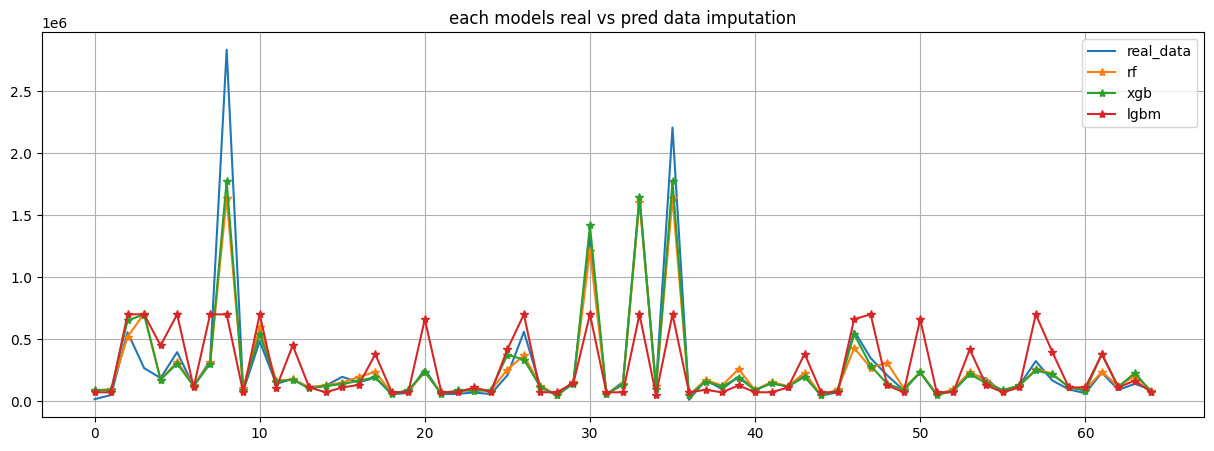

In [47]:
plt.figure(figsize=(15,5))
plt.plot(result["전기사용량"], label ="real_data")
plt.plot(result["전기사용량_rf_imputation"], "*-", label = "rf")
plt.plot(result["전기사용량_xgb_imputation"], "*-", label = "xgb")
plt.plot(result["전기사용량_imputation_lgbm"], "*-", label = "lgbm") 

plt.legend()
plt.grid()
plt.title("each models real vs pred data imputation")
plt.show()

### NaN의 전력수요를 추정하는 방법을 사용한다.

In [59]:
NA_list = []
for i in df["전기사용량"]:
    if i==0:
        NA_list.append(np.nan)
    else:
        NA_list.append(i)

df["전기사용량_1"] = NA_list

In [52]:
# 각 열에 대한 결측치 확인
df23 = df[df["단지분류"].isnull()]

In [57]:
np.unique(df["단지분류"])

TypeError: '<' not supported between instances of 'float' and 'str'

In [85]:
dangi = []
for i, v in zip(df["단지분류"], df["법정동주소"]):
    if pd.isna(i) or "아파트" in v:
        dangi.append("아파트")
    else:
        dangi.append(i)
df["단지분류"] = dangi

In [86]:
df["단지분류"] = dangi